# EAS 4610 - Earth Systems Modeling - Final Project
## Landscape Evolution - Terrain Change Model
### By: Carson Clements, Maci Harrell, Kevin Lu
### Due: Tuesday, December 5th at 11:59 PM ET
### Requirements/Rubric: https://gatech.instructure.com/courses/321828/assignments/1404688
### Original Paper (Landscape Evolution, Willgoose 2004): https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.33.092203.122610

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
Grid_Length = 100  # Length in meters
T = 100   # Simulation time - years
W = 0.00    # Soil Production Rate

Nx = 100   # Number of spatial grid points
Nt = 500   # Number of time steps
dx = Grid_Length / (Nx - 1)
dt = T / Nt

Slope_Peak = 2 # meters
Slope_Width_Constant = 100

U = 0     # Tectonic Uplift - meters
lamb = 365*24*60 # Occurrence of entrainment (detachment) events per m^2 per year. 
M = 1e-6 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
L = 2 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.1   # Advection velocity - Transport of landscape downwind with time - meters per year
D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

In [3]:
def Initialize():
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width_Constant))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))


    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [4]:
def Solve(R):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    for n in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            advection_term = u * (R[n, i + 1] - R[n, i - 1]) / (2 * dx)
            diffusion_term = D * (R[n, i + 1] - 2 * R[n, i] + R[n, i - 1]) / dx**2
            R[n + 1, i] = R[n, i] + dt * (diffusion_term - advection_term + U)
    return R

### Figures

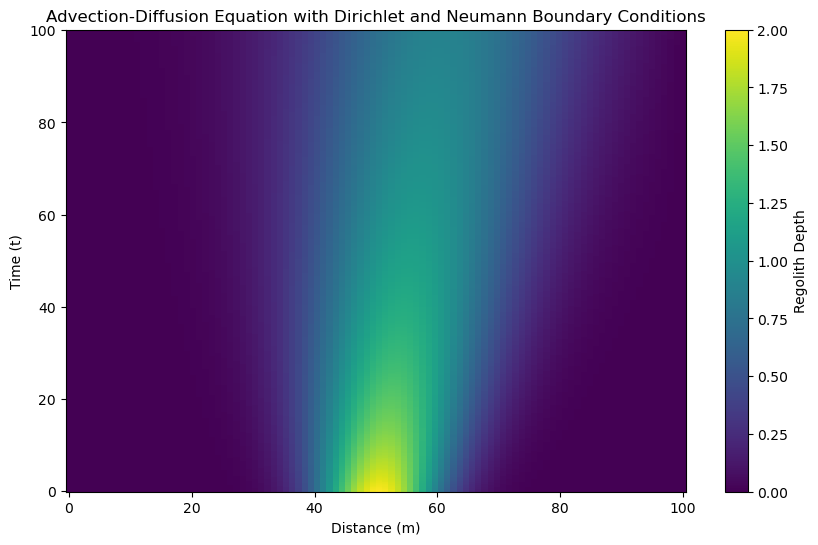

In [5]:
# Plot the results with Dirichlet and Neumann boundary conditions
R = Initialize()
R = Solve(R)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t)')
plt.show()

In [11]:
U = 0     # Tectonic Uplift - meters
lamb = 365*24*60 # Occurrence of entrainment (detachment) events per m^2 per year. 
M = 1e-6 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
L = 4 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.1   # Advection velocity - Transport of landscape downwind with time - meters per year
D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

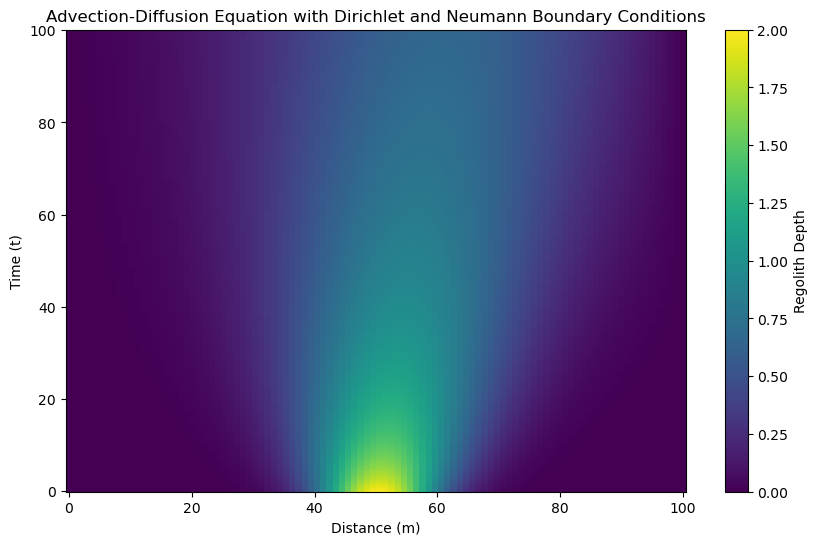

In [12]:
R = Initialize()
R = Solve(R)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t)')
plt.show()

In [9]:
U = 0.005     # Tectonic Uplift - meters
lamb = 365*24*60 # Occurrence of entrainment (detachment) events per m^2 per year. 
M = 1e-6 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
L = 2 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.1   # Advection velocity - Transport of landscape downwind with time - meters per year
D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

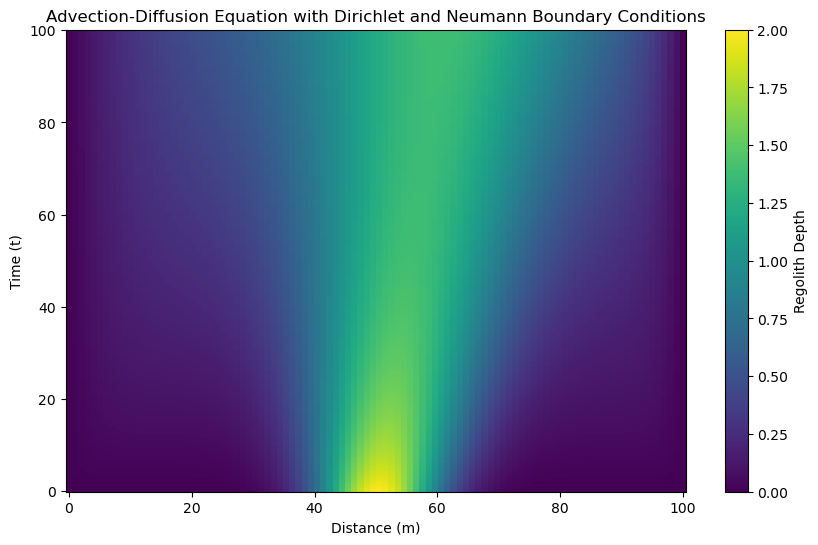

In [10]:
R = Initialize()
R = Solve(R)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t)')
plt.show()

In [14]:
U = 0.005     # Tectonic Uplift - meters
lamb = 365*24*60 # Occurrence of entrainment (detachment) events per m^2 per year. 
M = 1e-6 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
L = 4 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.1   # Advection velocity - Transport of landscape downwind with time - meters per year
D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

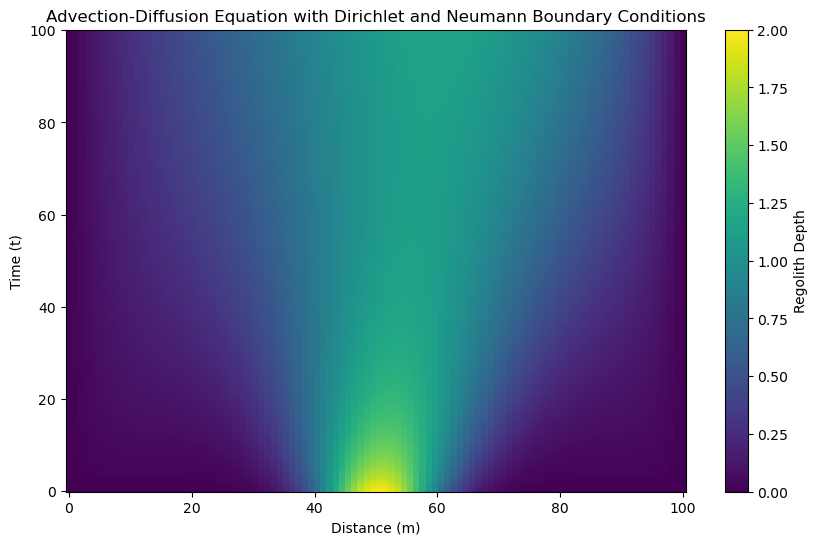

In [15]:
R = Initialize()
R = Solve(R)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t)')
plt.show()